In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score, precision_score, recall_score


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Reading the Dataset from Google drive**

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW__20231024.csv')



In [4]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71129 entries, 0 to 71128
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(77), int64(56), object(2)
memory usage: 73.3+ MB
None


# **First 5 rows of the Dataset**

In [5]:
data.head(5)

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,MT,2021/04/17,5,60,2,6,59,2,3.0,66,...,NaN,0,NaN,0,NaN,0,28.0,19,48.0,19
1,MA,2021/04/15,11,89,1,10,90,1,13.0,100,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,AR,2021/04/14,14,95,2,18,91,2,2.0,109,...,NaN,0,NaN,0,NaN,0,249.0,109,421.0,109
3,HI,2021/04/14,2,24,0,2,24,0,0.0,26,...,NaN,0,NaN,0,NaN,0,64.0,22,94.0,22
4,AK,2021/04/13,1,21,0,1,21,0,0.0,22,...,NaN,0,NaN,0,NaN,0,45.0,22,74.0,22


# **Data Preprocessing**

In [6]:
data = data.fillna(0)

missing_values = data.isnull().sum()
missing_values

state                                                      0
date                                                       0
critical_staffing_shortage_today_yes                       0
critical_staffing_shortage_today_no                        0
critical_staffing_shortage_today_not_reported              0
                                                          ..
staffed_icu_pediatric_patients_confirmed_covid_coverage    0
staffed_pediatric_icu_bed_occupancy                        0
staffed_pediatric_icu_bed_occupancy_coverage               0
total_staffed_pediatric_icu_beds                           0
total_staffed_pediatric_icu_beds_coverage                  0
Length: 135, dtype: int64

# **Critical Staffing Shortages Classification Model**

In [7]:
numeric_features = [col for col in data.columns if col not in ['state', 'date', 'critical_staffing_shortage_today_yes']]
categorical_features = ['state']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))])

X = data.drop(['critical_staffing_shortage_today_yes'], axis=1)
y = data['critical_staffing_shortage_today_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4271
           1       0.64      0.77      0.70      1698
           2       0.63      0.58      0.60      1127
           3       0.55      0.54      0.55       703
           4       0.49      0.46      0.48       567
           5       0.41      0.38      0.39       440
           6       0.47      0.33      0.39       426
           7       0.33      0.46      0.38       358
           8       0.41      0.10      0.17       336
           9       0.37      0.51      0.43       359
          10       0.29      0.36      0.32       300
          11       0.22      0.45      0.30       255
          12       0.54      0.41      0.47       284
          13       0.25      0.13      0.17       141
          14       0.37      0.27      0.32       191
          15       0.37      0.26      0.31       185
          16       0.21      0.10      0.14       125
          17       0.52    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# **Accuracy and F1-Score**

In [8]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate macro-averaged F1-score
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("F1-Score (Macro):", f1)


Accuracy: 0.5851258259524814
F1-Score (Macro): 0.10046812380411992


# **Mean Absolute Error and Mean Squared Error**

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 1.7212146773513286
Mean Squared Error (MSE): 28.945030226346127


# **Covid-19 Hospitalization (RandomForest) Regression Model**

In [10]:
X = data[['inpatient_beds', 'inpatient_beds_used', 'previous_day_admission_adult_covid_confirmed']]
y = data['total_adult_patients_hospitalized_confirmed_covid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Define a threshold for classifying predictions
threshold = 500

# Binarize predictions based on the threshold
y_pred_bin = [1 if y >= threshold else 0 for y in y_pred]
y_test_bin = [1 if y >= threshold else 0 for y in y_test]

# Calculate precision, recall, and F1-score for the binary classification
precision = precision_score(y_test_bin, y_pred_bin)
recall = recall_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.9248606465997771
Recall: 0.9325539568345323
F1-score: 0.9286913690809357


# **Correlation Matrix**

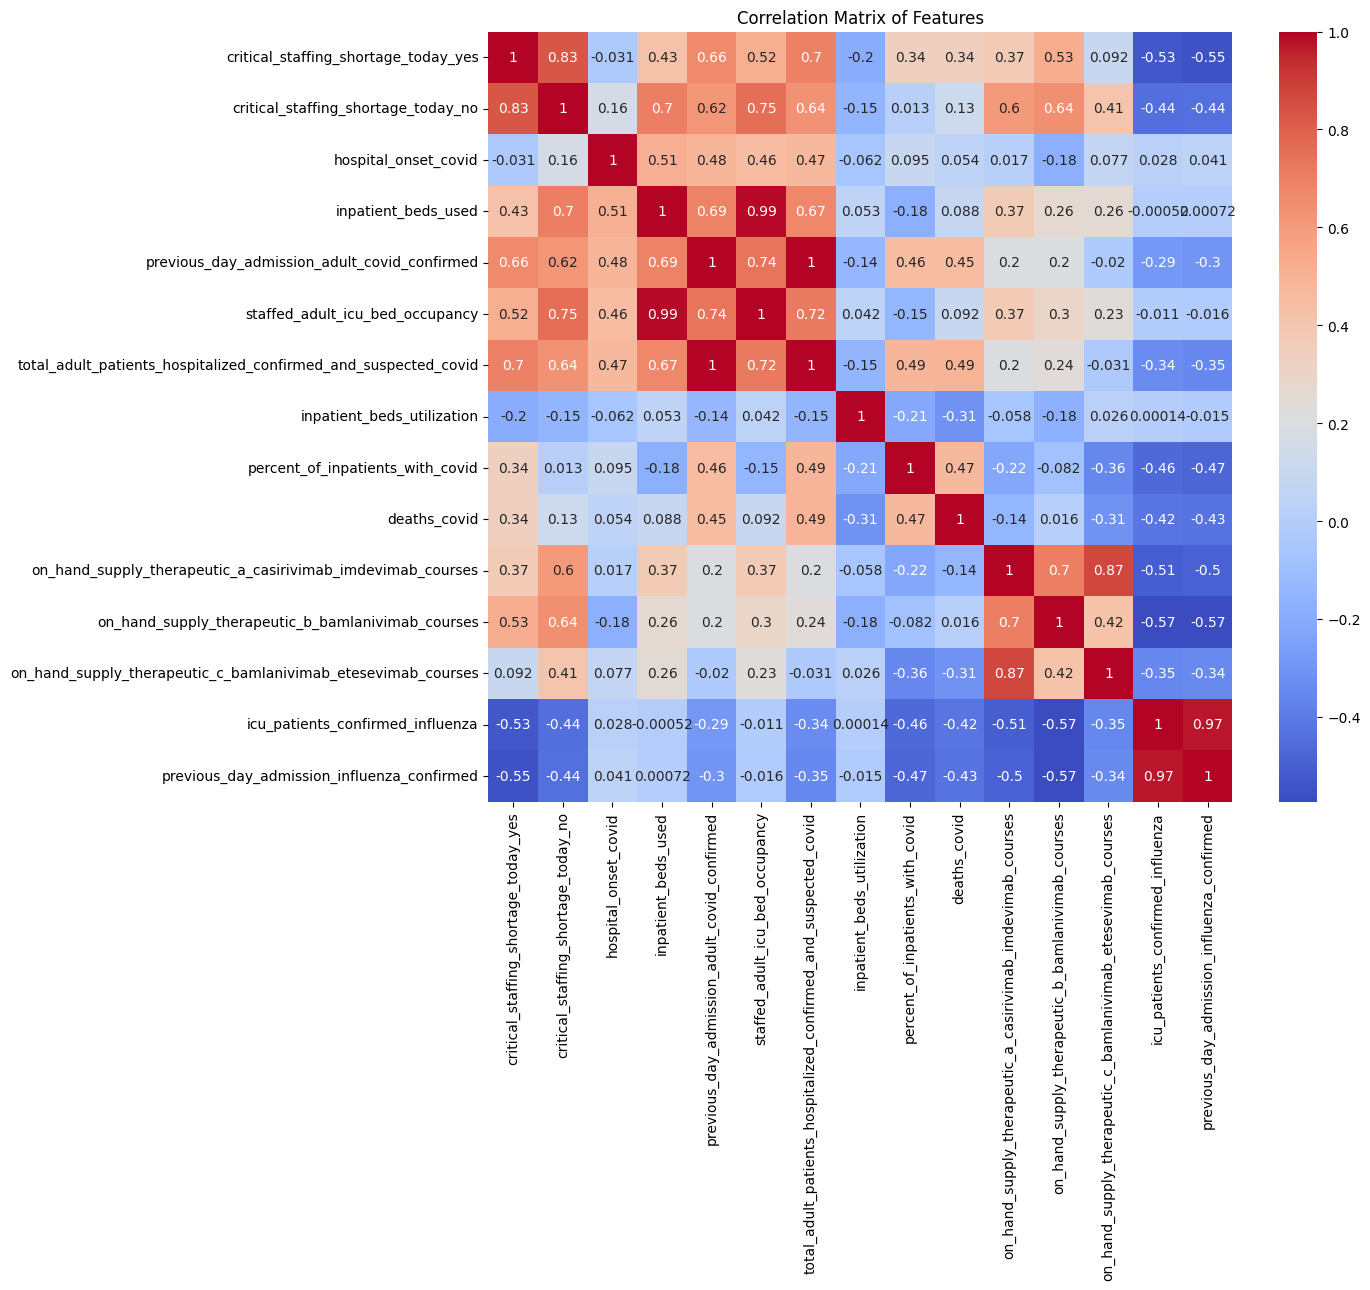

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = [
    'critical_staffing_shortage_today_yes',
    'critical_staffing_shortage_today_no',
    'hospital_onset_covid',
    'inpatient_beds_used',
    'previous_day_admission_adult_covid_confirmed',
    'staffed_adult_icu_bed_occupancy',
    'total_adult_patients_hospitalized_confirmed_and_suspected_covid',
    'inpatient_beds_utilization',
    'percent_of_inpatients_with_covid',
    'deaths_covid',
    'on_hand_supply_therapeutic_a_casirivimab_imdevimab_courses',
    'on_hand_supply_therapeutic_b_bamlanivimab_courses',
    'on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses',
    'icu_patients_confirmed_influenza',
    'previous_day_admission_influenza_confirmed',
]

selected_data = data[selected_columns]

correlation_full_health = selected_data.corr()

plt.figure(figsize=(12, 10))
correlation_matrix = correlation_full_health.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()




# **Data Visualizations**

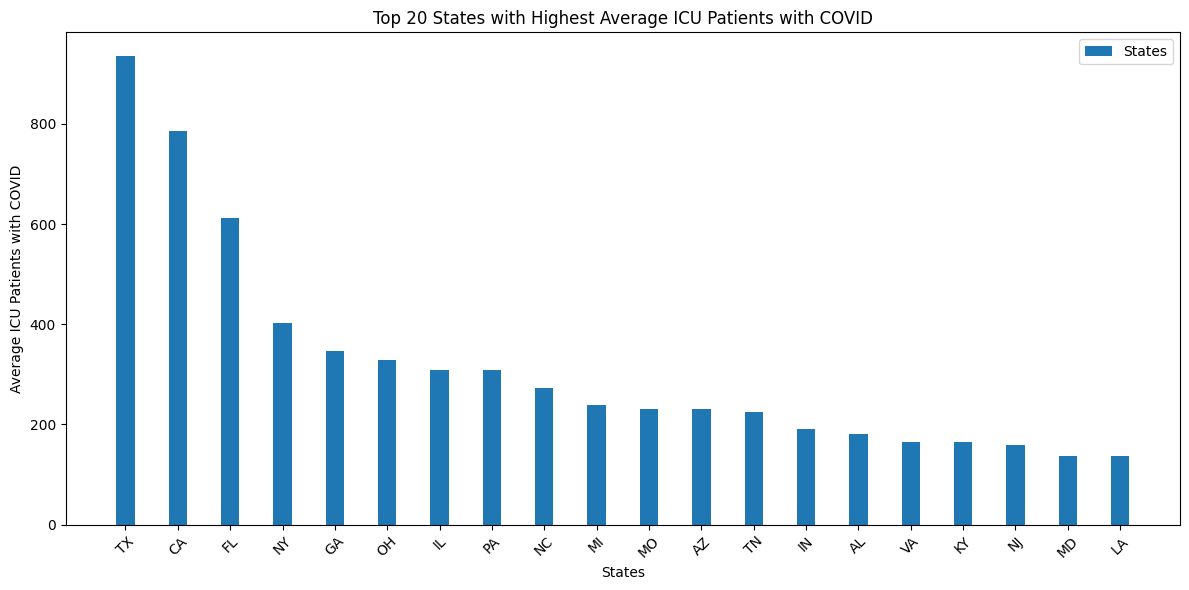

In [12]:


state_data = data.groupby('state')['staffed_icu_adult_patients_confirmed_and_suspected_covid'].mean().reset_index()

state_data = state_data.sort_values(by='staffed_icu_adult_patients_confirmed_and_suspected_covid', ascending=False)

top_n = 20
top_states = state_data['state'][:top_n]
top_state_values = state_data['staffed_icu_adult_patients_confirmed_and_suspected_covid'][:top_n]

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35

index = np.arange(top_n)

bar1 = ax.bar(index, top_state_values, bar_width, label='States')

ax.set_xlabel('States')
ax.set_ylabel('Average ICU Patients with COVID')
ax.set_title(f'Top {top_n} States with Highest Average ICU Patients with COVID')
ax.set_xticks(index)
ax.set_xticklabels(top_states, rotation=45)

ax.legend()

plt.tight_layout()
plt.show()


In [13]:


grouped_data = data.groupby('date').agg({
    'staffed_icu_adult_patients_confirmed_and_suspected_covid': 'mean',
    'inpatient_beds_utilization': 'mean',
    'percent_of_inpatients_with_covid': 'mean',
    'deaths_covid': 'sum',
    'icu_patients_confirmed_influenza': 'sum'
}).reset_index()

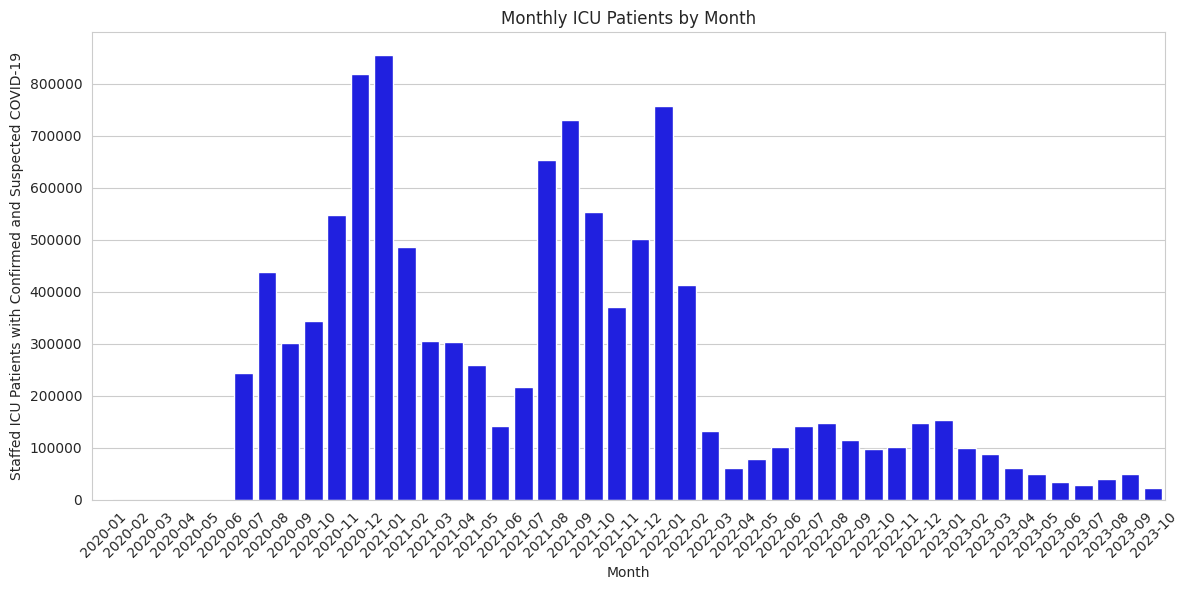

In [14]:
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.strftime('%Y-%m')

monthly_total = df.groupby('month')['staffed_icu_adult_patients_confirmed_and_suspected_covid'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=monthly_total, x='month', y='staffed_icu_adult_patients_confirmed_and_suspected_covid', color='b')
plt.xlabel('Month')
plt.ylabel('Staffed ICU Patients with Confirmed and Suspected COVID-19')
plt.title('Monthly ICU Patients by Month')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

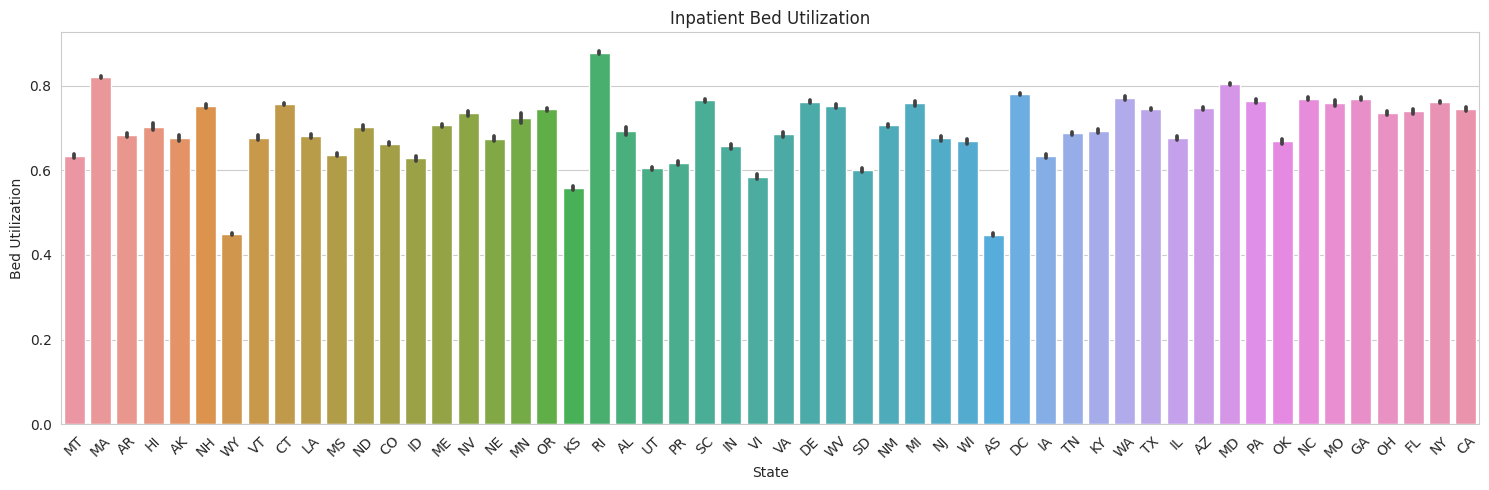

In [15]:
plt.figure(figsize=(15, 5))

sns.barplot(data=df, x='state', y='inpatient_beds_utilization')
plt.title('Inpatient Bed Utilization')
plt.xlabel('State')
plt.ylabel('Bed Utilization')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


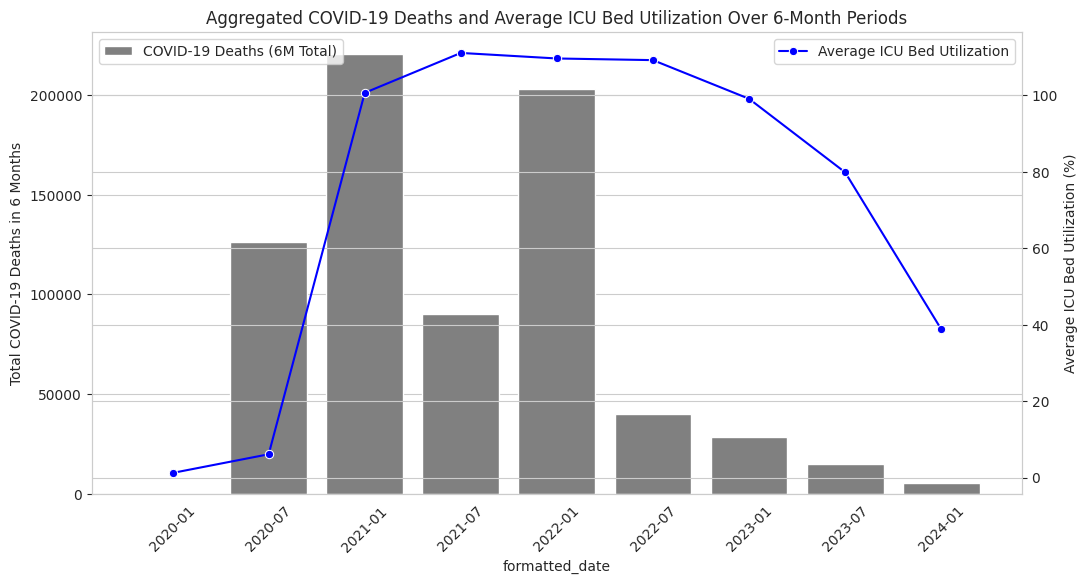

In [16]:
df_6m_aggregated = pd.DataFrame(data)

df_6m_aggregated = df.resample('6M', on='date').agg({
    'deaths_covid': 'sum',
    'adult_icu_bed_covid_utilization_coverage': 'mean'
}).reset_index()

df_6m_aggregated['formatted_date'] = df_6m_aggregated['date'].dt.strftime('%Y-%m')

plt.figure(figsize=(12, 6))

ax1 = sns.barplot(data=df_6m_aggregated, x='formatted_date', y='deaths_covid', color='grey', label='COVID-19 Deaths (6M Total)')
plt.ylabel('Total COVID-19 Deaths in 6 Months')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

ax2 = ax1.twinx()
sns.lineplot(data=df_6m_aggregated, x='formatted_date', y='adult_icu_bed_covid_utilization_coverage', marker='o', color='blue', label='Average ICU Bed Utilization')
plt.ylabel('Average ICU Bed Utilization (%)')
plt.legend(loc='upper right')

plt.title('Aggregated COVID-19 Deaths and Average ICU Bed Utilization Over 6-Month Periods')
plt.show()

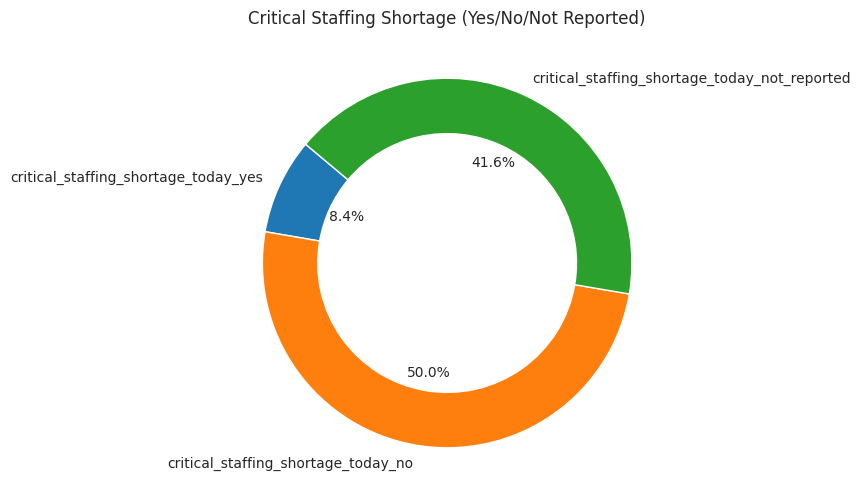

In [17]:

shortage_data = df[['critical_staffing_shortage_today_yes',
                         'critical_staffing_shortage_today_no',
                         'critical_staffing_shortage_today_not_reported']].sum()

plt.figure(figsize=(8, 6))
plt.pie(shortage_data, labels=shortage_data.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Critical Staffing Shortage (Yes/No/Not Reported)')
plt.show()


# **Scatter Plot**

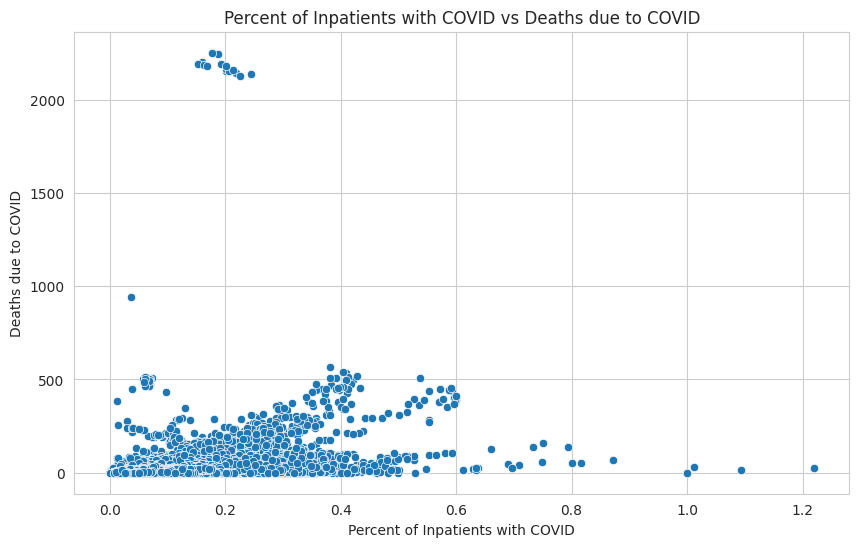

0.3256498264356533

In [18]:
data_second_pair = data[['percent_of_inpatients_with_covid', 'deaths_covid']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='percent_of_inpatients_with_covid', y='deaths_covid', data=data)
plt.title('Percent of Inpatients with COVID vs Deaths due to COVID')
plt.xlabel('Percent of Inpatients with COVID')
plt.ylabel('Deaths due to COVID')
plt.show()

correlation_second_pair = data_second_pair.corr().iloc[0, 1]
correlation_second_pair


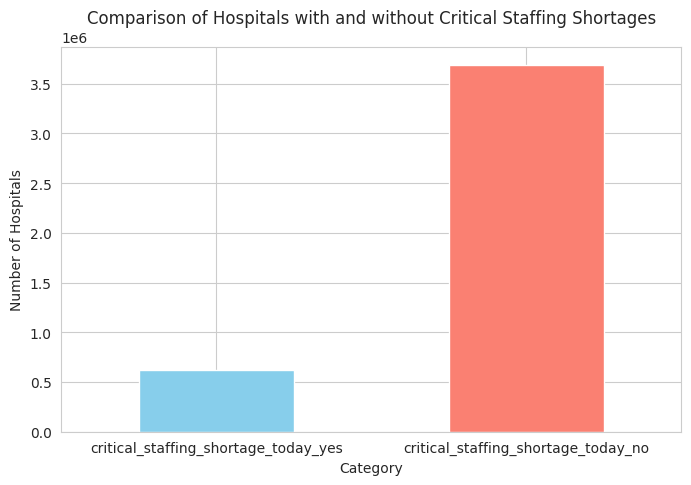

In [19]:
shortage_yes_no = data[['critical_staffing_shortage_today_yes', 'critical_staffing_shortage_today_no']].sum()

plt.figure(figsize=(8, 5))
shortage_yes_no.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Hospitals with and without Critical Staffing Shortages')
plt.xlabel('Category')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=0)
plt.show()


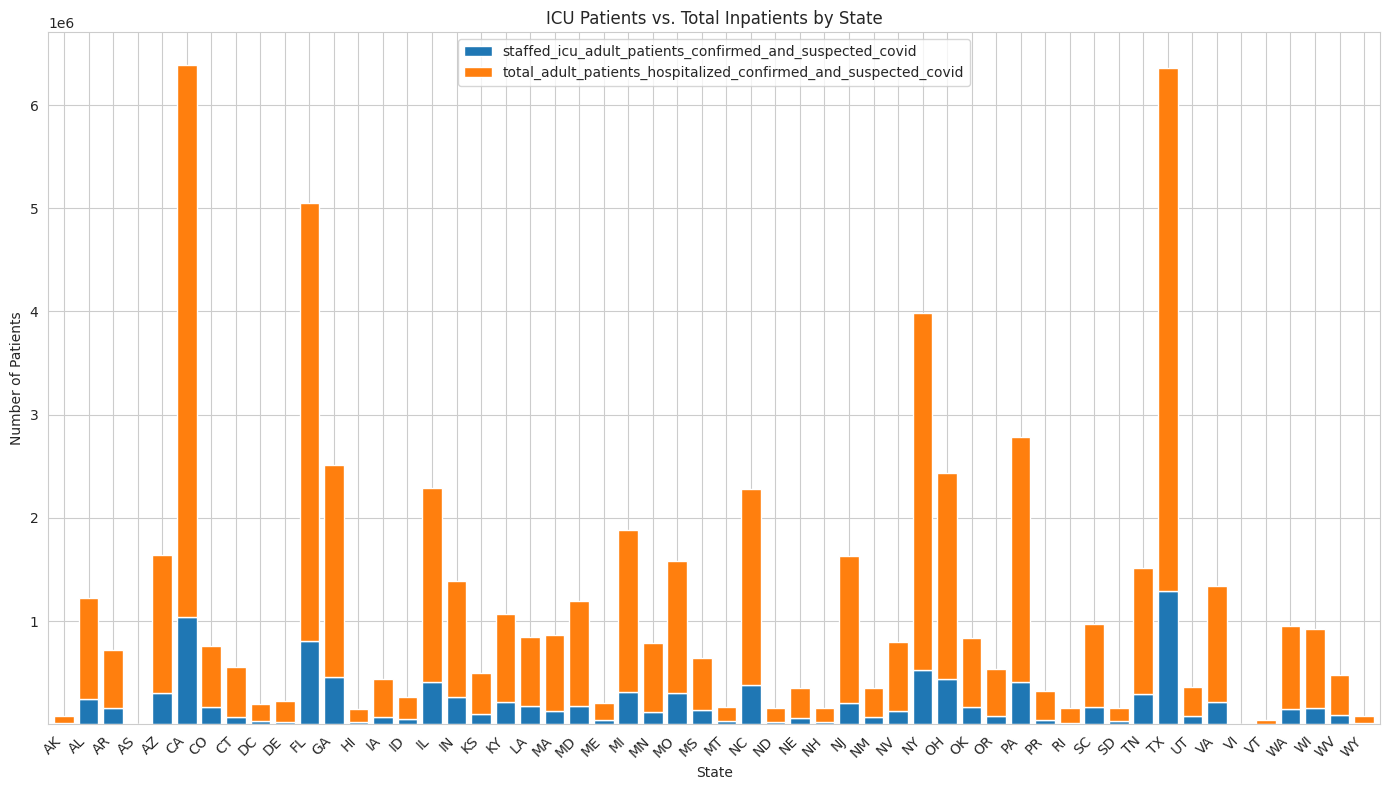

In [20]:
df_grouped = data.groupby('state')[['staffed_icu_adult_patients_confirmed_and_suspected_covid', 'total_adult_patients_hospitalized_confirmed_and_suspected_covid']].sum()

plt.figure(figsize=(14, 8))
df_grouped.plot(kind='bar', stacked=True, width=0.8, ax=plt.gca())

plt.title('ICU Patients vs. Total Inpatients by State')
plt.ylabel('Number of Patients')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
